In [1]:
import pandas as pd
import pickle
import numpy as np

In [5]:

df = pickle.load(open('dataset_level2.pkl','rb'))

In [6]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [7]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [8]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [9]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])
#stadium first over

In [10]:
df['city'] = cities

In [11]:

df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [12]:
df.drop(columns=['venue'],inplace=True)

In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [14]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()
#min 5 matches are played in city

In [15]:
df = df[df['city'].isin(eligible_cities)]

In [16]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [17]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']
#total run cumulative current score 

<ipython-input-17-ac174c139314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [18]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [19]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df
#ball left,wicket left

<ipython-input-19-4fd5a57c1fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
<ipython-input-19-4fd5a57c1fcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [20]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df
#over*ball no.=>balls are thrown 

<ipython-input-20-e7d17f656852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [21]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df
#balls left 

<ipython-input-21-7ed065e8960c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
<ipython-input-21-7ed065e8960c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [22]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']
#how many wickets are left

<ipython-input-22-e0234112d42f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
<ipython-input-22-e0234112d42f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
<ipython-input-22-e0234112d42f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [23]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [24]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']
#current score and balls thrown . 

<ipython-input-24-fad47fc85776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [25]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [26]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

    #rolling e.g 10 overs sum
    #dataframes divided into grps
    #loop for match_id=>dataframe rolling winddow 30 overs sum
    #runs sum
    #after 30 changes


In [27]:
df['last_five'] = last_five


<ipython-input-27-83d24d575aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [47]:
#df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','']]

In [30]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')
#final score

In [31]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]


In [32]:
final_df.dropna(inplace=True)
#drop missing values

In [33]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [35]:
final_df = final_df.sample(final_df.shape[0])

In [36]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
8917,New Zealand,Pakistan,Dubai,93,34,6,6.488372,26.0,153
41976,South Africa,West Indies,Johannesburg,78,78,8,11.142857,57.0,231


In [48]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [37]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#

array([[<AxesSubplot:title={'center':'match_id'}>,
        <AxesSubplot:title={'center':'ball'}>,
        <AxesSubplot:title={'center':'runs'}>],
       [<AxesSubplot:title={'center':'player_dismissed'}>,
        <AxesSubplot:title={'center':'current_score'}>,
        <AxesSubplot:title={'center':'balls_bowled'}>],
       [<AxesSubplot:title={'center':'balls_left'}>,
        <AxesSubplot:title={'center':'wickets_left'}>,
        <AxesSubplot:title={'center':'crr'}>],
       [<AxesSubplot:title={'center':'last_five'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

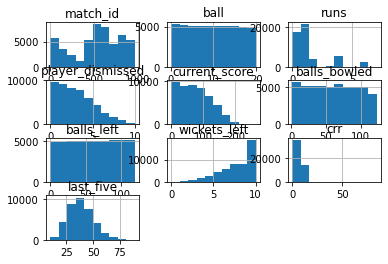

In [51]:
df.shape
df.hist()

In [38]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
16070,Bangladesh,South Africa,Cape Town,74,80,6,11.100000,60.0
16600,Pakistan,Sri Lanka,Johannesburg,83,53,7,7.432836,50.0
8646,Pakistan,Australia,Dubai,75,58,10,7.258065,29.0
13636,Pakistan,New Zealand,Auckland,73,43,5,5.688312,35.0
12265,Pakistan,England,Manchester,124,34,8,8.651163,43.0
...,...,...,...,...,...,...,...,...
11038,New Zealand,India,Auckland,79,48,7,6.583333,21.0
16229,New Zealand,India,Johannesburg,91,45,6,7.280000,28.0
50192,Bangladesh,India,Mirpur,32,87,8,5.818182,32.0
8291,New Zealand,Sri Lanka,Auckland,91,40,5,6.825000,45.0


In [56]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [57]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [58]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [59]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [60]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9896251129528858
1.5418364144164658


In [ ]:
pickle.dump(pipe,open('pipe.pkl','wb'))